In [2]:
#fear emotion

#데이터 pandas로 읽기, 구문이 탭으로 구분되어있음.
import pandas as pd
train_fear_df = pd.read_csv("feartrainalldata.txt","\t") 
test_fear_df = pd.read_csv("feartestalldata.txt","\t")

#konlpy는 띄어쓰기 알고리즘과 정규화를 이용해 맞춤법이 틀린 문장을 고치고 형태소 분석과 품사를 태깅해주는 클래스를 제공함.
from konlpy.tag import Okt
okt_fear = Okt()

def fear_tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=False)]#08.22 stem=false로 바꿔봄. 
    #'구분자'.join(list) => 리스트 값과 값 사이에 구분자를 넣어 문자열을 하나로 합침. ex) '_'.join(['a','b','c'])이면 "a_b_c"로 반환
    #pos(text) => 품사를 태깅한 상태로 명사를 변환, ex) 컴퓨터(x), 컵퓨터,noun(o)
    #norm => 정규화 ex) 그래욬ㅋㅋㅋ => 그래요
    #stem => 근어로 표현 ex) 그래요 => 그렇다

train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna(''); #null값을 ''로 대체
test_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

train_fear_docs = [(fear_tokenize(row[1]), row[2]) for row in train_fear_df.values] #traindata 저장 row[1] : document / row[2] : label
test_fear_docs = [(fear_tokenize(row[1]),row[2]) for row in test_fear_df.values] #testdata 저장

tokens = [t for d in train_fear_docs for t in d[0]]

import nltk
fear_text = nltk.Text(tokens, name='FEAR') 
#문서 하나를 편리하게 탐색할 수 있는 기능 제공 (vocab().most_common() 사용)
# print(len(fear_text.tokens)) #토큰 개수
# print(len(set(fear_text.tokens))) #중복을 제외한 토큰 수
# print(fear_text.vocab().most_common(10)) #출력빈도가 높은 상위 토큰 10개

#countvectorization
FEAR_FREQUENCY_COUNT = 3000; #자주 사용되는 토큰 설정
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)] #선택되어진 토큰들

def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
#x축에는 문서에 들어가는 단어 개수(단어들의 빈도수 정보)

y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]
#y축에는 1 or 0, 분류 결과

import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')
#np.asarray는 np.array와 달리 데이터 형태가 같을 때 복사하지 않음.
#데이터 float로 형 변환

import tensorflow as tf #텐서플로 케라스
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#레이어 구성은 dense층은 64개의 유닛, 활성함수는 relu, 마지막 층은 sigmoid 활성화 함수 사용

fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )
#손실 함수는 binary_crossentropy, RMSprop 옵티마이저를 통해 경사하강법 진행

fear_model.fit(x_fear_train, y_fear_train, epochs=50, batch_size=512)
#배치 사이즈 줄이면 한 번에 판단하는 데이터 수 증가함. 에포크 50번
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

fear_review = "너무 무섭다"
fear_token = fear_tokenize(fear_review)

fear_tf = fear_term_frequency(fear_token)
f_data = np.expand_dims(np.asarray(fear_tf).astype('float32'),axis=0)
float(fear_model.predict(f_data))

#surprise emotion

import pandas as pd
train_surprise_df = pd.read_csv("surprisetrainalldata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestalldata.txt","\t")

from konlpy.tag import Okt
okt_surprise = Okt()

def surprise_tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=False)]

train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
test_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

train_surprise_docs = [(surprise_tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(surprise_tokenize(row[1]),row[2]) for row in test_surprise_df.values]

tokens = [t for d in train_surprise_docs for t in d[0]]

import nltk
surprise_text = nltk.Text(tokens, name='SURP')
#print(len(surprise_text.tokens))
#print(len(set(surprise_text.tokens)))
#print(surprise_text.vocab().most_common(10))

SURPRISE_FREQUENCY_COUNT = 3000; #variable
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

surprise_model.fit(x_surprise_train, y_surprise_train, epochs=50, batch_size=512)
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)
surprise_review = "너무 놀랍다"
surprise_token = surprise_tokenize(surprise_review)

tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

#anger emotion

import pandas as pd
train_anger_df = pd.read_csv("angertrainalldata.txt","\t")
test_anger_df = pd.read_csv("angertestalldata.txt","\t")

from konlpy.tag import Okt
okt_anger = Okt()

def anger_tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=False)]

train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
test_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

train_anger_docs = [(anger_tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(anger_tokenize(row[1]),row[2]) for row in test_anger_df.values]

tokens = [t for d in train_anger_docs for t in d[0]]

import nltk
anger_text = nltk.Text(tokens, name='ANGE')
#print(len(anger_text.tokens))
#print(len(set(anger_text.tokens)))
#print(anger_text.vocab().most_common(10))

ANGER_FREQUENCY_COUNT = 3000; #variable
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

anger_model.fit(x_anger_train, y_anger_train, epochs=50, batch_size=512)
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

anger_review = "너무 화난다"
anger_token = anger_tokenize(anger_review)

tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

#sadness emotion

import pandas as pd
train_sadness_df = pd.read_csv("sadnesstrainalldata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestalldata.txt","\t")

from konlpy.tag import Okt
okt_sadness = Okt()

def sadness_tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=False)]

train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
test_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

train_sadness_docs = [(sadness_tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(sadness_tokenize(row[1]),row[2]) for row in test_sadness_df.values]

tokens = [t for d in train_sadness_docs for t in d[0]]

import nltk
sadness_text = nltk.Text(tokens, name='SADN')
#print(len(sadness_text.tokens))
#print(len(set(sadness_text.tokens)))
#print(sadness_text.vocab().most_common(10))

SADNESS_FREQUENCY_COUNT = 3000; #variable
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

sadness_model.fit(x_sadness_train, y_sadness_train, epochs=50, batch_size=512)
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)
sadness_review = "너무 화난다"
sadness_token = sadness_tokenize(sadness_review)

tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

#neutral emotion

import pandas as pd
train_neutral_df = pd.read_csv("neutraltrainalldata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestalldata.txt","\t")

from konlpy.tag import Okt
okt_neutral = Okt()

def neutral_tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=False)]

train_neutral_df.isnull().any()
train_neutral_df['document'] = train_neutral_df['document'].fillna('');
test_neutral_df.isnull().any()
test_neutral_df['document'] = test_neutral_df['document'].fillna('');

train_neutral_docs = [(neutral_tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(neutral_tokenize(row[1]),row[2]) for row in test_neutral_df.values]

tokens = [t for d in train_neutral_docs for t in d[0]]

import nltk
neutral_text = nltk.Text(tokens, name='NEUT')
#print(len(neutral_text.tokens))
#print(len(set(neutral_text.tokens)))
#print(neutral_text.vocab().most_common(10))

NEUTRAL_FREQUENCY_COUNT = 3000; #variable
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

neutral_model.fit(x_neutral_train, y_neutral_train, epochs=50, batch_size=512)
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)
neutral_review = "너무 화난다"
neutral_token = neutral_tokenize(neutral_review)

tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

# happy emotion

import pandas as pd
train_happy_df = pd.read_csv("happytrainalldata.txt","\t")
test_happy_df = pd.read_csv("happytestalldata.txt","\t")

from konlpy.tag import Okt
okt_happy = Okt()

def happy_tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=False)]

train_happy_df.isnull().any()
train_happy_df['document'] = train_happy_df['document'].fillna('');
test_happy_df.isnull().any()
test_happy_df['document'] = test_happy_df['document'].fillna('');

train_happy_docs = [(happy_tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(happy_tokenize(row[1]),row[2]) for row in test_happy_df.values]

tokens = [t for d in train_happy_docs for t in d[0]]

import nltk
happy_text = nltk.Text(tokens, name='HAPP')
#print(len(happy_text.tokens))
#print(len(set(happy_text.tokens)))
#print(happy_text.vocab().most_common(10))

HAPPY_FREQUENCY_COUNT = 3000; #variable
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

happy_model.fit(x_happy_train, y_happy_train, epochs=50, batch_size=512)
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

happy_review = "너무 화난다"
happy_token = happy_tokenize(happy_review)

tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

#disgust emotion

import pandas as pd
train_disgust_df = pd.read_csv("disgusttrainalldata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestalldata.txt","\t")

from konlpy.tag import Okt
okt_disgust = Okt()

def disgust_tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=False)]

train_disgust_df.isnull().any()
train_disgust_df['document'] = train_disgust_df['document'].fillna('');
test_disgust_df.isnull().any()
test_disgust_df['document'] = test_disgust_df['document'].fillna('');

train_disgust_docs = [(disgust_tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(disgust_tokenize(row[1]),row[2]) for row in test_disgust_df.values]

tokens = [t for d in train_disgust_docs for t in d[0]]

import nltk
disgust_text = nltk.Text(tokens, name='DISG')
#print(len(disgust_text.tokens))
#print(len(set(disgust_text.tokens)))
#print(disgust_text.vocab().most_common(10))

DISGUST_FREQUENCY_COUNT = 3000; #variable
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=50, batch_size=512)
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)
disgust_review = "너무 화난다"
disgust_token = disgust_tokenize(disgust_review)

tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

#function

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
    
def predict(predict):
    fear_token = fear_tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    #print(f"공포({round(fear_score*100)}%)")
    fear = round(fear_score*100)
    surprise_token = surprise_tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    #print(f"놀람({round(surprise_score*100)}%)")
    surprise = round(surprise_score*100)
    anger_token = anger_tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    #print(f"분노({round(anger_score*100)}%)")
    anger = round(anger_score*100)
    sadness_token = sadness_tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    #print(f"슬픔({round(sadness_score*100)}%)")
    sadness = round(sadness_score*100)
    neutral_token = neutral_tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    #print(f"중립({round(neutral_score*100)}%)")
    neutral = round(neutral_score*100)
    happy_token = happy_tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    #print(f"행복({round(happy_score*100)}%)")
    happy = round(happy_score*100)
    disgust_token = disgust_tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    #print(f"혐오({round(disgust_score*100)}%)")
    disgust = round(disgust_score*100)
    total = fear+disgust+sadness+happy+anger+neutral+surprise
 
    ## set data
    df = pd.DataFrame({
    'Character': ['RESULT'],
    'Fear': [round(100/(total)*fear)],
    'Disgust': [round(100/(total)*disgust)],
    'Sadness': [round(100/(total)*sadness)],
    'Happy': [round(100/(total)*happy)],
    'Angry': [round(100/(total)*anger)],
    'Neutral': [round(100/(total)*neutral)],
    'Surprise': [round(100/(total)*surprise)],
    })
    labels = df.columns[1:]
    num_labels = len(labels)
    
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
    fig = plt.figure(figsize=(15,20))
    fig.set_facecolor('white')
 
    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.iloc[i].drop('Character').tolist()
        data += data[:1]
    
        ax = plt.subplot(3,2,i+1, polar=True)
        ax.set_theta_offset(pi / 2) ## 시작점
        ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
        plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
        ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
        plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'], fontsize=10) ## y축 눈금 설정
        plt.ylim(0,100)
    
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
        ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
        plt.title(row.Character, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
        plt.tight_layout(pad=5) ## subplot간 패딩 조절
        plt.show()

    print(f"공포({round(100/(total)*fear)}%)")
    print(f"혐오({round(100/(total)*disgust)}%)")
    print(f"슬픔({round(100/(total)*sadness)}%)")
    print(f"행복({round(100/(total)*happy)}%)")
    print(f"분노({round(100/(total)*anger)}%)")
    print(f"중립({round(100/(total)*neutral)}%)")
    print(f"놀람({round(100/(total)*surprise)}%)")

Epoch 1/50
53/53 [==============================] - 0s 7ms/step - loss: 0.4217 - binary_accuracy: 0.8569
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 0.3164 - binary_accuracy: 0.8682
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2833 - binary_accuracy: 0.8842
Epoch 4/50
53/53 [==============================] - 0s 8ms/step - loss: 0.2625 - binary_accuracy: 0.8937
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2450 - binary_accuracy: 0.9011
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2284 - binary_accuracy: 0.9098
Epoch 7/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2116 - binary_accuracy: 0.9170
Epoch 8/50
53/53 [==============================] - 0s 7ms/step - loss: 0.1945 - binary_accuracy: 0.9240
Epoch 9/50
53/53 [==============================] - 0s 8ms/step - loss: 0.1775 - binary_accuracy: 0.9316
Epoch 10/50
53/53 [==============================] - 0s

53/53 [==============================] - 0s 8ms/step - loss: 0.0188 - binary_accuracy: 0.9937
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0174 - binary_accuracy: 0.9936A: 0s - loss: 0.0175 - binary_accuracy: 0.99
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0169 - binary_accuracy: 0.9935
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0159 - binary_accuracy: 0.9939
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0156 - binary_accuracy: 0.9940
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0148 - binary_accuracy: 0.9941
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - binary_accuracy: 0.9941
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0141 - binary_accuracy: 0.9946
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - binary_accuracy: 0.9942
Epoch 36/50
53

53/53 [==============================] - 0s 7ms/step - loss: 0.4058 - binary_accuracy: 0.8614
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2893 - binary_accuracy: 0.8798
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2551 - binary_accuracy: 0.8974
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2342 - binary_accuracy: 0.9064
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2171 - binary_accuracy: 0.9134
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2016 - binary_accuracy: 0.9198
Epoch 7/50
53/53 [==============================] - 0s 7ms/step - loss: 0.1862 - binary_accuracy: 0.9267
Epoch 8/50
53/53 [==============================] - 0s 7ms/step - loss: 0.1712 - binary_accuracy: 0.9342
Epoch 9/50
53/53 [==============================] - 0s 7ms/step - loss: 0.1568 - binary_accuracy: 0.9398
Epoch 10/50
53/53 [==============================] - 0s 7ms/step -

53/53 [==============================] - 0s 8ms/step - loss: 0.0149 - binary_accuracy: 0.9953
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0144 - binary_accuracy: 0.9954
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0133 - binary_accuracy: 0.9959
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0128 - binary_accuracy: 0.9956
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - binary_accuracy: 0.9959
Epoch 32/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0117 - binary_accuracy: 0.9960
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - binary_accuracy: 0.9964
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0112 - binary_accuracy: 0.9961
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0106 - binary_accuracy: 0.9963
Epoch 36/50
53/53 [==============================] - 0s 8m

53/53 [==============================] - 0s 7ms/step - loss: 0.3500 - binary_accuracy: 0.8595
Epoch 3/50
53/53 [==============================] - 0s 8ms/step - loss: 0.3203 - binary_accuracy: 0.8651
Epoch 4/50
53/53 [==============================] - 0s 9ms/step - loss: 0.2982 - binary_accuracy: 0.8759
Epoch 5/50
53/53 [==============================] - 0s 8ms/step - loss: 0.2781 - binary_accuracy: 0.8860
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2582 - binary_accuracy: 0.8975
Epoch 7/50
53/53 [==============================] - 0s 8ms/step - loss: 0.2369 - binary_accuracy: 0.9078
Epoch 8/50
53/53 [==============================] - 0s 8ms/step - loss: 0.2144 - binary_accuracy: 0.9181
Epoch 9/50
53/53 [==============================] - 0s 8ms/step - loss: 0.1915 - binary_accuracy: 0.9290
Epoch 10/50
53/53 [==============================] - 0s 7ms/step - loss: 0.1684 - binary_accuracy: 0.9397
Epoch 11/50
53/53 [==============================] - 0s 9ms/step 

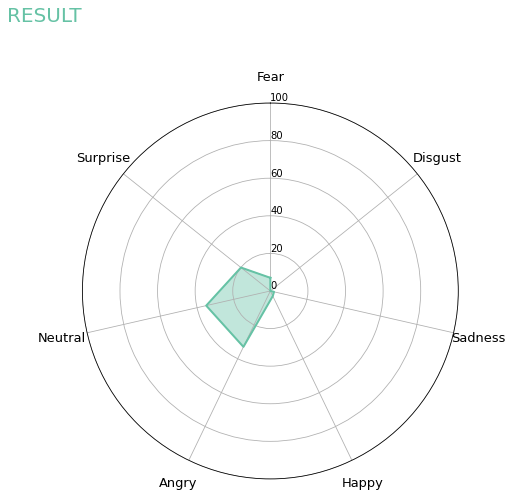

공포(7%)
혐오(0%)
슬픔(2%)
행복(3%)
분노(33%)
중립(35%)
놀람(20%)


In [71]:
predict("정말 이게 기사야???")